# AcadGild_DataScience_ML_Assignment_30

<b> Objective : </b> Using PCA (Principal Component Analysis) ,  to transform iris data into 3 dimensions and plot a 3d
chart with transformed dimensions and color each data point with specific class.

In [ ]:
# Solution

### Load Python Modules 

In [1]:
%matplotlib inline
import numpy as np # For numerical operations on datafarme
import pandas as pd # For DataFrame and other data struture operations
import matplotlib.pyplot as plt # For Data Visualisation
from mpl_toolkits.mplot3d import Axes3D # For 3D representaion of data
import seaborn as sns# For Data Visualisation
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Pyhton module for Machine Learning

from sklearn.decomposition  import PCA  as sklearnPCA # Principal compenent Analysis from sklearn decomposition method
from sklearn import datasets # Loading data from sklearn library
from sklearn.preprocessing import StandardScaler
from matplotlib.cm import register_cmap
from scipy import stats
from sklearn.model_selection import train_test_split # to split data into train and test
from sklearn.metrics import accuracy_score , confusion_matrix # for model evaluation


### Load Dataset

In [3]:
# Load Iris dataset from sklearn library
iris_dataset = datasets.load_iris()

In [4]:
# Description of data set

print("Description of iris dataset : \n" , iris_dataset.DESCR)

Description of iris dataset : 
 .. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ===

In [5]:
# Feature from iris dataset

iris_features = iris_dataset.feature_names
print("Iris data Features : \n" , iris_features)

Iris data Features : 
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [6]:
# Traget vatriables  from Iris dataset

print("Traget variable from iris dataset")
iris_target= iris_dataset.target
print("Sample rows form target: \n",iris_target )

Traget variable from iris dataset
Sample rows form target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [7]:
# Feature data   from Iris dataset

print("Traget variable from iris dataset")
iris_data= iris_dataset.data
print("Sample rows form fetaure data: \n",iris_data[0:10] )

Traget variable from iris dataset
Sample rows form fetaure data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]


In [8]:
# Transforming data from  iris data into Daataframe


df_IrisData = pd.DataFrame(data= iris_data , columns= iris_features)
print("Sample rows:")
df_IrisData.head()

Sample rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
print("Shape of iris data :\n" , df_IrisData.shape)

Shape of iris data :
 (150, 4)


In [10]:
# Assign Target varible into iris dataframe variable 
df_IrisData['target'] = iris_target

print("Sample rows after adding target column: \n")
df_IrisData.head()

Sample rows after adding target column: 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#### Exploratory data analysis

In [11]:
# Check whether data set conins null /NA

df_IrisData.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [12]:
#Statiscal analysis except target columns
df_IrisData.iloc[:,0:4].describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [13]:
# Unique values in target column 

df_IrisData['target'].unique()

array([0, 1, 2], dtype=int64)

#### Visual Analysis of data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A5A3F3E5C0>,
      dtype=object)

<Figure size 1080x720 with 0 Axes>

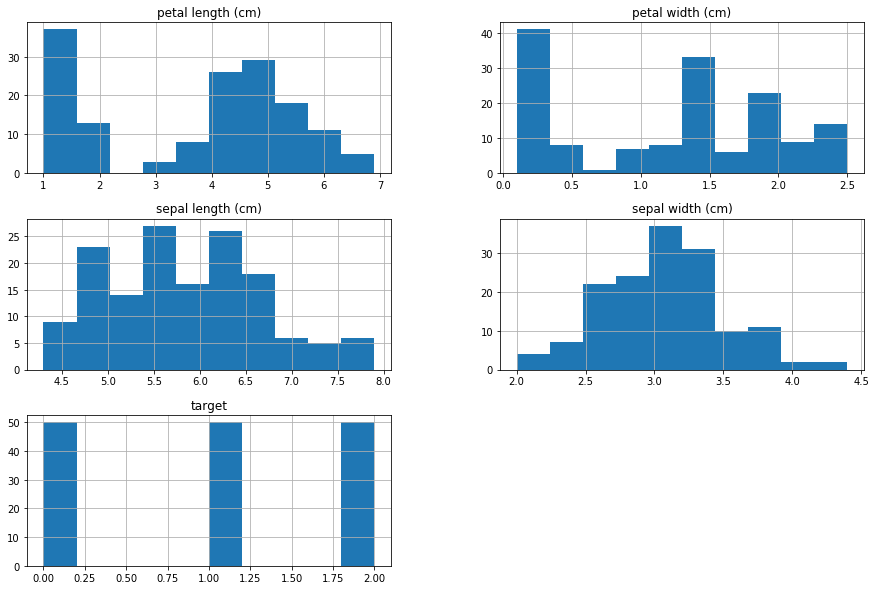

In [14]:
# Distirbution of features of iris data
plt.figure(figsize=(15,10))
df_IrisData.hist(figsize=(15,10))

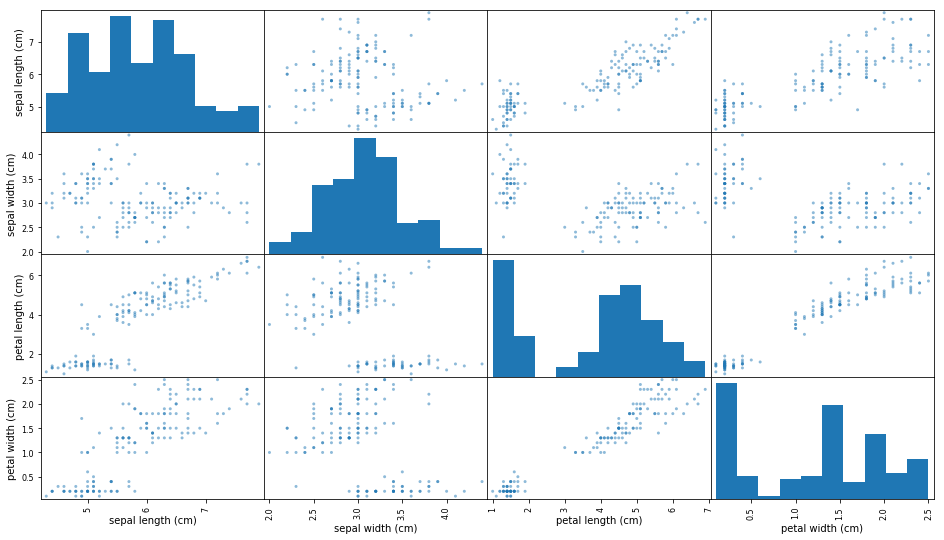

In [15]:
# Scatter plot between features

from pandas.plotting import scatter_matrix
scatter_matrix(frame=df_IrisData.iloc[:,0:4] , figsize=(16,9))
plt.show()

Text(0.5, 1.0, 'Correlation between different fearures')

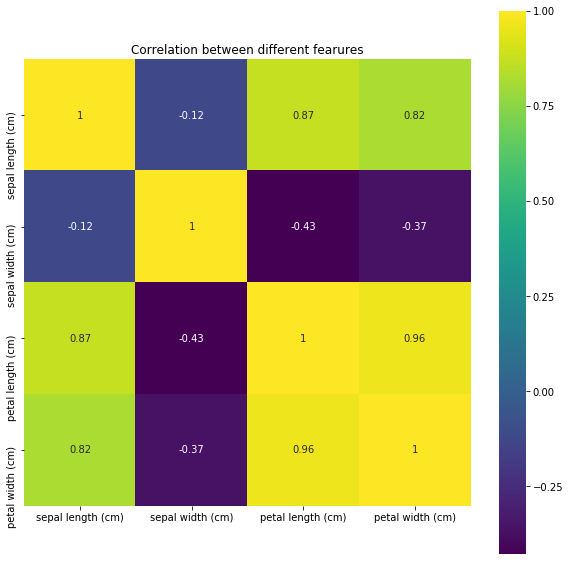

In [16]:
#Correlation map between features

correlation = df_IrisData.iloc[:,0:4].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='viridis')

plt.title('Correlation between different fearures')

### Data Prepration for Machine learning algorithm


In [17]:
# Selection of feature and target data 

df_Feature = df_IrisData.iloc[:,0:4]
df_target = df_IrisData.iloc[:,-1:]


In [18]:
# Sample rows  of target data

df_target.head()

,target
0,0
1,0
2,0
3,0
4,0


In [19]:
# Sample rows  of Feature data
df_Feature.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#Split the data into train test

<b> Scaling / Normalizing the dataset before applying over PCA algorithm </b>

Standardizing data

In [20]:

# Scale the data to be between -1 and 1
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std=scaler.fit_transform(df_Feature)  # applying  feature dataframe to normalize features before applying over PCA
X_std[0:10]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ],
       [-0.53717756,  1.93979142, -1.16971425, -1.05217993],
       [-1.50652052,  0.78880759, -1.34022653, -1.18381211],
       [-1.02184904,  0.78880759, -1.2833891 , -1.3154443 ],
       [-1.74885626, -0.36217625, -1.34022653, -1.3154443 ],
       [-1.14301691,  0.09821729, -1.2833891 , -1.44707648]])

<b> Apply data into PCA algorithm </b>

In [21]:
# PCA algorithm from sklearn.decomposition
from sklearn.decomposition import PCA

sklearnPCA = PCA(n_components= 3)   # n_compenets : defines no. of principal components to be selected, for problem its given 3-dimension
Y_sklearn = sklearnPCA.fit_transform(X_std)  # Applying normalize data into PCA
print("Sample Components values")
Y_sklearn[0:10]

Sample Components values


array([[-2.26470281,  0.4800266 , -0.12770602],
       [-2.08096115, -0.67413356, -0.23460885],
       [-2.36422905, -0.34190802,  0.04420148],
       [-2.29938422, -0.59739451,  0.09129011],
       [-2.38984217,  0.64683538,  0.0157382 ],
       [-2.07563095,  1.48917752,  0.02696829],
       [-2.44402884,  0.0476442 ,  0.3354704 ],
       [-2.23284716,  0.22314807, -0.0886955 ],
       [-2.33464048, -1.11532768,  0.14507686],
       [-2.18432817, -0.46901356, -0.25376557]])

In [22]:
# Trasaforming Principle compenents returned by PCA model with traget variable into dataframe
df_Compenets = pd.DataFrame(data = Y_sklearn, columns = ['principal component 1', 'principal component 2', 'principal component 3'])
df_Compenets = pd.concat([df_Compenets,df_target[['target']]], axis=1)
df_Compenets.head()

,principal component 1,principal component 2,principal component 3,target
0,-2.264703,0.480027,-0.127706,0
1,-2.080961,-0.674134,-0.234609,0
2,-2.364229,-0.341908,0.044201,0
3,-2.299384,-0.597395,0.091290,0
4,-2.389842,0.646835,0.015738,0


In [23]:
# Statistical evbaluation of PCA model

#check the statistical values of the model transformed from 4D to 3D
print(f"components_ in the data transformed to 3D : \n{sklearnPCA.components_}\n")
print(f"explained_variance_ in the data transformed to 3D : \n{sklearnPCA.explained_variance_}\n")
print(f"score in the data transformed to 3D : \n{sklearnPCA.score(X_std)}")

components_ in the data transformed to 3D : 
[[ 0.52106591 -0.26934744  0.5804131   0.56485654]
 [ 0.37741762  0.92329566  0.02449161  0.06694199]
 [-0.71956635  0.24438178  0.14212637  0.63427274]]

explained_variance_ in the data transformed to 3D : 
[2.93808505 0.9201649  0.14774182]

score in the data transformed to 3D : 
-3.2684460753664863


#### 3-D Viasualisation of principal components



In [24]:
# Transforming iris data target variable classes into tuple

class_var = list(range(3)) # 3 classes 0,1,2
class_var_desc = list(iris_dataset.target_names)
class_variable = tuple(zip(class_var_desc,class_var))
print("iris data class :", class_variable)
list(class_variable)

iris data class : (('setosa', 0), ('versicolor', 1), ('virginica', 2))


[('setosa', 0), ('versicolor', 1), ('virginica', 2)]

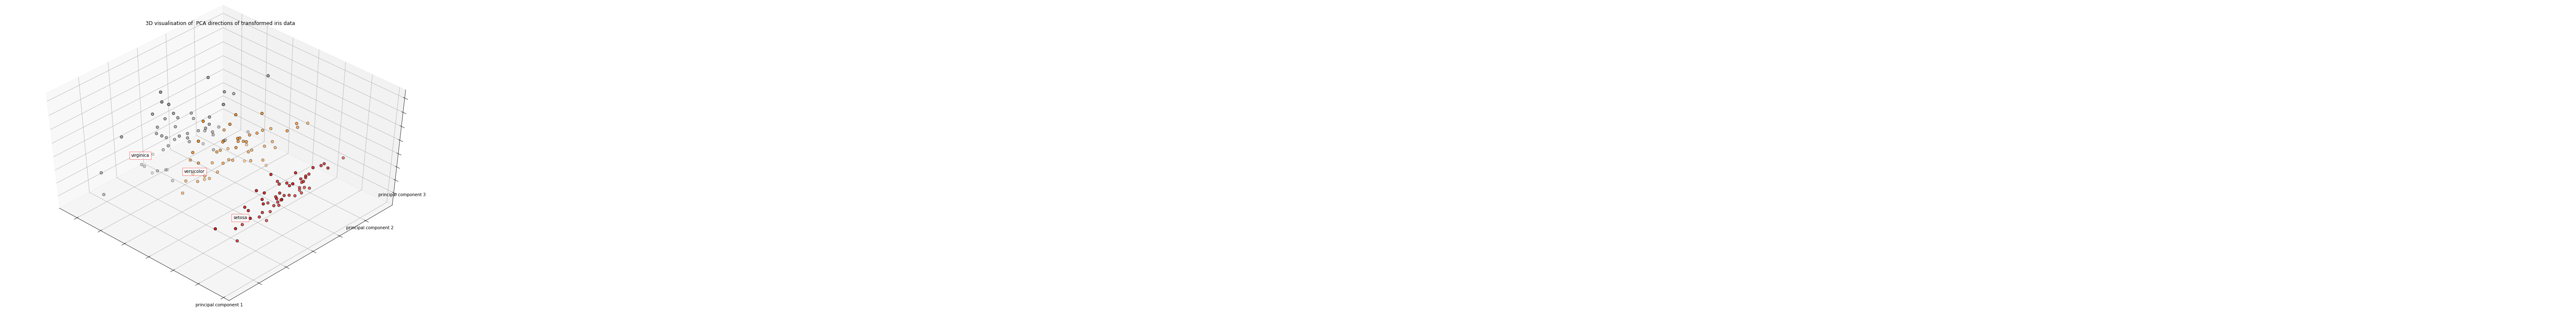

In [28]:
# 3-D Visualisation of components

#Plots a 3d chart with transformed dimensions and color each data point with specific class
from mpl_toolkits.mplot3d import Axes3D


figure = plt.figure(1, figsize=(15, 10))
plt.clf()
ax = Axes3D( fig= figure , rect=[0, 0, .95, 1], elev=48, azim=134)
plt.cla()

# Assigning lables to axis of graph
for name, label in list(class_variable):
    ax.text3D(
        Y_sklearn[iris_target == label, 0].mean(),
        Y_sklearn[iris_target == label, 1].mean() + 1.5,
        Y_sklearn[iris_target == label, 2].mean(), name,
        horizontalalignment='center',  verticalalignment='center',
        bbox=dict(alpha=.5, edgecolor='r', facecolor='w'))

# Setting up data points on graph
ax.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1], Y_sklearn[:, 2], c=iris_target, cmap=plt.cm.Set1, edgecolor='k', s=40   )
ax.set_title("3D visualisation of  PCA directions of transformed iris data")
ax.w_xaxis.set_ticklabels(['principal component 1'])
ax.w_yaxis.set_ticklabels(['principal component 2'])
ax.w_zaxis.set_ticklabels(['principal component 3'])
plt.show()    


